<a href="https://colab.research.google.com/github/Athul-Rajagopal/car-type-prediction-vgg16/blob/master/vgg16_car_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import sklearn
import cv2

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,decode_predictions,preprocess_input
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [ ]:
vgg=VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
model_temp= Flatten()(vgg.output)
outlayer1=Dense(5,activation='softmax')(model_temp)

In [ ]:
model=Model(inputs=vgg.input,outputs=outlayer1)

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
path=pathlib.Path(r'/content/drive/MyDrive/Colab Notebooks/CNN/car_model')

In [ ]:
cross=list(path.glob('crossover/*.jpg'))+list(path.glob('crossover/*.jpg'))
hatch=list(path.glob('hacth/*.jpg'))+list(path.glob('hacth/*.jpg'))
muvs=list(path.glob('muvs/*.jpg'))+list(path.glob('muvs/*.jpg'))
sed=list(path.glob('sedan/*.jpg'))+list(path.glob('sedan/*.jpg'))
suvs=list(path.glob('suvs/*.jpg'))+list(path.glob('suvs/*.jpg'))

In [ ]:
len(cross), len(hatch), len(muvs), len(sed), len(suvs)

(208, 236, 248, 274, 330)

In [ ]:
model_li={'cross_over':cross,'hatch_back':hatch,'MUV':muvs,'sedan':sed,'SUV':suvs}
labels={'cross_over':0,'hatch_back':1,'MUV':2,'sedan':3,'SUV':4}

In [ ]:
x=[]
y=[]

In [ ]:
for model_names in model_li:
    name_path=model_li[model_names]
    for cars in name_path:
        car_img=cv2.imread(str(cars))
        car_img=cv2.resize(car_img,(224,224))
        car_img=car_img/255
        x.append(car_img)
        y.append(labels[model_names])


In [ ]:
x=np.array(x)
y=np.array(y)

x.shape, y.shape

((1296, 224, 224, 3), (1296,))

In [ ]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((907, 224, 224, 3), (907,), (389, 224, 224, 3), (389,))

In [ ]:
xtrain=xtrain.reshape(907,224,224,3)
xtest=xtest.reshape(389,224,224,3)

In [ ]:
xtrain, ytrain

In [ ]:
hist=model.fit(xtrain,ytrain,batch_size=90,epochs=10,verbose=1,validation_data=(xtest,ytest))

Epoch 1/10
11/11 [==============================] - 74s 2s/step - loss: 1.9088 - accuracy: 0.2972 - val_loss: 1.1187 - val_accuracy: 0.5450
Epoch 2/10
11/11 [==============================] - 10s 976ms/step - loss: 0.7906 - accuracy: 0.7301 - val_loss: 0.8825 - val_accuracy: 0.6658
Epoch 3/10
11/11 [==============================] - 10s 979ms/step - loss: 0.6019 - accuracy: 0.7997 - val_loss: 0.6635 - val_accuracy: 0.8123
Epoch 4/10
11/11 [==============================] - 10s 975ms/step - loss: 0.3441 - accuracy: 0.9360 - val_loss: 0.5725 - val_accuracy: 0.8380
Epoch 5/10
11/11 [==============================] - 10s 974ms/step - loss: 0.2266 - accuracy: 0.9696 - val_loss: 0.5265 - val_accuracy: 0.8535
Epoch 6/10
11/11 [==============================] - 10s 976ms/step - loss: 0.1703 - accuracy: 0.9845 - val_loss: 0.4538 - val_accuracy: 0.8792
Epoch 7/10
11/11 [==============================] - 10s 979ms/step - loss: 0.1283 - accuracy: 0.9950 - val_loss: 0.4089 - val_accuracy: 0.8869
Ep

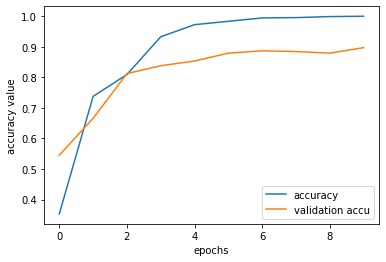

In [ ]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accu')
plt.xlabel('epochs')
plt.ylabel('accuracy value')
plt.legend()

In [ ]:
img=cv2.imread(r'/content/drive/MyDrive/Colab Notebooks/CNN/car_model/sedan/MercedesBenz-CLS-Exterior-141234.jpg')
img=cv2.resize(img,(224,224))
img=img/255
img_to_predict=np.array(img).reshape(1,224,224,3)


In [ ]:
img.shape


(224, 224, 3)

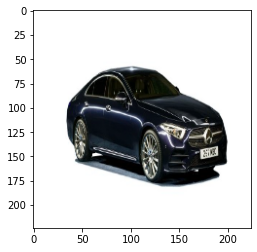

In [ ]:
plt.imshow(img)

In [ ]:
res=model.predict(img_to_predict)
res.ndim

2

In [ ]:
labels={'cross_over':0,'hatch_back':1,'MUV':2,'sedan':3,'SUV':4}
for i in labels:
    if np.argmax(res)==labels[i]:
        print('model=>',i)


model=> sedan
